In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dados = pd.read_excel('/content/DatasetComparacao.xlsx')

In [ ]:
dados.head()

,PERIODO,PIB,PESADOSP,PESADORIO,PESADOBRASIL
0,2003-01-01,100.000000,110.264594,99.223295,104.405426
1,2003-02-01,104.514069,106.106098,88.073804,100.670444
2,2003-03-01,100.406810,113.623417,93.355740,110.228054
3,2003-04-01,100.228140,114.163462,93.586017,111.028933
4,2003-05-01,99.088078,122.459622,96.211511,116.094954


In [ ]:
dados.shape

(60, 5)

In [ ]:
dados.describe()

,PERIODO,PIB,PESADOSP,PESADORIO,PESADOBRASIL
count,60,60.000000,60.000000,60.000000,60.000000
mean,2005-06-16 06:24:00,111.000621,132.429319,104.909604,121.825929
min,2003-01-01 00:00:00,97.739988,106.106098,88.073804,100.670444
25%,2004-03-24 06:00:00,106.135863,123.707938,99.770829,116.304687
50%,2005-06-16 00:00:00,110.373688,134.218274,105.998369,123.424119
75%,2006-09-08 12:00:00,115.838458,139.666834,109.788620,126.749241
max,2007-12-01 00:00:00,125.446531,159.381675,117.744979,143.126895
std,NaN,7.412071,11.702950,6.974686,8.793580


In [ ]:
dados.corr().round(3)

,PERIODO,PIB,PESADOSP,PESADORIO,PESADOBRASIL
PERIODO,1.000,0.978,0.750,0.670,0.652
PIB,0.978,1.000,0.739,0.659,0.650
PESADOSP,0.750,0.739,1.000,0.887,0.982
PESADORIO,0.670,0.659,0.887,1.000,0.878
PESADOBRASIL,0.652,0.650,0.982,0.878,1.000


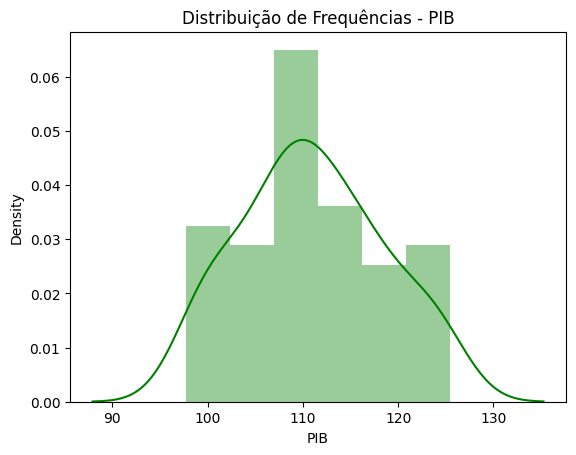

In [ ]:
sns.distplot(dados['PIB'], color='green')
plt.title('Distribuição de Frequências - PIB')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados['PIB'] = scaler.fit_transform(dados['PIB'].values.reshape(-1, 1))

dados.head()

,PERIODO,PIB,PESADOSP,PESADORIO,PESADOBRASIL
0,2003-01-01,-1.496674,110.264594,99.223295,104.405426
1,2003-02-01,-0.882519,106.106098,88.073804,100.670444
2,2003-03-01,-1.441326,113.623417,93.355740,110.228054
3,2003-04-01,-1.465635,114.163462,93.586017,111.028933
4,2003-05-01,-1.620744,122.459622,96.211511,116.094954


<Axes: title={'center': 'PIB'}, xlabel='PIB', ylabel='PIB'>

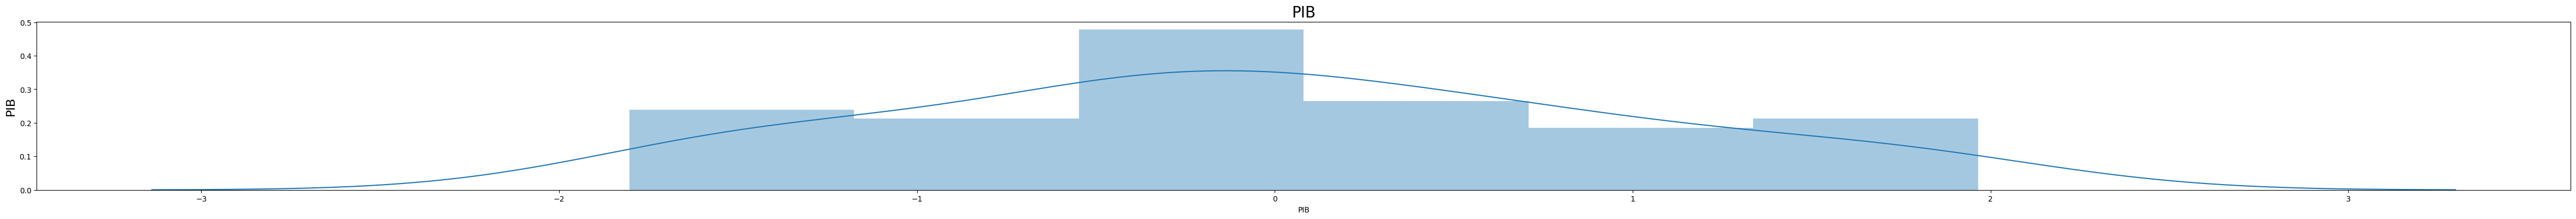

In [ ]:
# Gerando um histograma para a coluna "consumo"
ax = sns.distplot(dados['PIB'])

ax.figure.set_size_inches(60, 4)
ax.set_title('PIB', fontsize=20)
ax.set_ylabel('PIB', fontsize=16)

ax

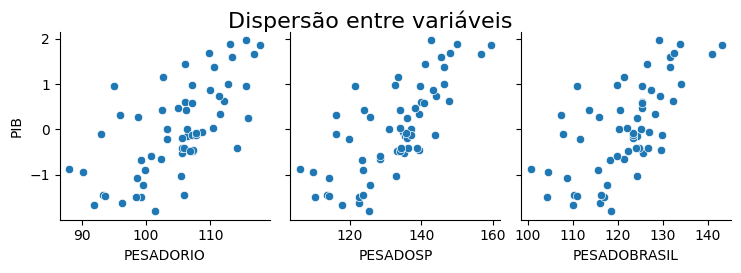

In [ ]:
ax = sns.pairplot(dados, y_vars='PIB', x_vars=['PESADORIO', 'PESADOSP', 'PESADOBRASIL'])
ax.fig.suptitle('Dispersão entre variáveis', fontsize=16, y=1.05)
ax

In [ ]:
y = dados['PIB']
y

0    -1.496674
1    -0.882519
2    -1.441326
3    -1.465635
4    -1.620744
5    -1.661997
6    -1.804157
7    -1.480704
8    -1.236212
9    -1.025378
10   -0.901412
11   -1.456254
12   -1.073325
13   -0.945150
14   -0.471337
15   -0.673333
16   -0.658046
17   -0.594235
18   -0.522761
19   -0.458948
20   -0.406195
21   -0.407805
22   -0.472117
23   -0.403953
24   -0.206144
25   -0.095421
26   -0.058381
27    0.015697
28   -0.136866
29    0.008151
30   -0.180106
31   -0.122144
32   -0.115787
33   -0.075172
34    0.035893
35    0.258178
36    0.421657
37    0.314257
38    0.342876
39    0.282025
40    0.480765
41    0.420582
42    0.608902
43    0.634482
44    0.578745
45    0.729375
46    0.862552
47    0.954156
48    0.987984
49    0.968567
50    1.000042
51    1.149624
52    1.388488
53    1.441246
54    1.593392
55    1.654986
56    1.695031
57    1.870301
58    1.886867
59    1.965418
Name: PIB, dtype: float64

In [ ]:
X = dados[['PESADORIO', 'PESADOSP', 'PESADOBRASIL' ]]
X

,PESADORIO,PESADOSP,PESADOBRASIL
0,99.223295,110.264594,104.405426
1,88.073804,106.106098,100.670444
2,93.355740,113.623417,110.228054
3,93.586017,114.163462,111.028933
4,96.211511,122.459622,116.094954
5,91.865046,117.801311,110.100854
6,101.409653,125.423233,118.595740
7,98.448018,122.587135,116.937845
8,99.480346,125.720187,117.726961
9,105.479347,132.973817,124.388468


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train

,PESADORIO,PESADOSP,PESADOBRASIL
52,110.629079,146.243884,131.611358
19,107.289117,139.383921,129.670478
42,106.076611,139.780584,125.389814
56,109.719460,147.980430,132.586980
17,100.743241,128.505055,119.932968
31,107.110775,143.758411,129.867974
49,95.053528,121.443650,110.950887
32,107.794886,136.961589,123.437872
47,115.533582,139.628917,125.445115
38,111.538629,139.260656,128.435375


In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_previsto = modelo.predict(X_test)
y_previsto

array([-0.28498482,  0.81001812, -1.9959035 ,  0.62178986,  0.31953412,
        1.27211153,  0.42008812,  0.28266452,  0.49462741, -0.03366338,
       -0.65282716,  0.97375441,  1.36671626, -2.07889342, -0.82730681,
       -0.01369394,  0.13658617, -0.70136246])

In [ ]:
y_test

39    0.282025
41    0.420582
2    -1.441326
48    0.987984
50    1.000042
44    0.578745
33   -0.075172
35    0.258178
40    0.480765
27    0.015697
24   -0.206144
53    1.441246
46    0.862552
3    -1.465635
26   -0.058381
36    0.421657
21   -0.407805
10   -0.901412
Name: PIB, dtype: float64

In [ ]:
MSE = metrics.mean_squared_error(y_test, y_previsto).round(2)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([MSE, RMSE, R2], ['MSE', 'RMSE', 'R²'], columns=['Métricas'])

,Métricas
MSE,0.24
RMSE,0.49
R²,0.61
